In [4]:
from lvmtipo.actors import lvm

from lvm.plotimg import plot_images
from lvmagp.images import Image


telescope_subsystem_name = "sci"
tss = await lvm.from_string(telescope_subsystem_name).start()

#await tss.foc.moveAbsolute(42)
await tss.pwi.status()

{'is_tracking': False,
 'is_connected': True,
 'is_slewing': False,
 'is_enabled': True,
 'ra_j2000_hours': 5.43851488949493,
 'dec_j2000_degs': -74.0432781661202,
 'ra_apparent_hours': 5.42926434085688,
 'dec_apparent_degs': -74.0275786416657,
 'altitude_degs': 45.0,
 'azimuth_degs': 180.0,
 'field_angle_rate_at_target_degs_per_sec': 0.0,
 'field_angle_here_degs': 4.65040076379532e-05,
 'field_angle_at_target_degs': 0.0,
 'axis0': {'dist_to_target_arcsec': 0.0,
  'is_enabled': True,
  'position_degs': 180.0,
  'rms_error_arcsec': 0.0,
  'servo_error_arcsec': 0.0},
 'axis1': {'dist_to_target_arcsec': 0.0,
  'is_enabled': True,
  'position_degs': 45.0,
  'rms_error_arcsec': 0.0,
  'servo_error_arcsec': 0.0},
 'model': {'filename': '',
  'num_points_enabled': 0,
  'num_points_total': 0,
  'rms_error_arcsec': 0.0},
 'geometry': 0}

['/data/lvm/sci/agcam/east/20230219/lvm.sci.agcam.east_00000018.fits', '/data/lvm/sci/agcam/center/20230219/lvm.sci.agcam.center_00000018.fits', '/data/lvm/sci/agcam/west/20230219/lvm.sci.agcam.west_00000018.fits']


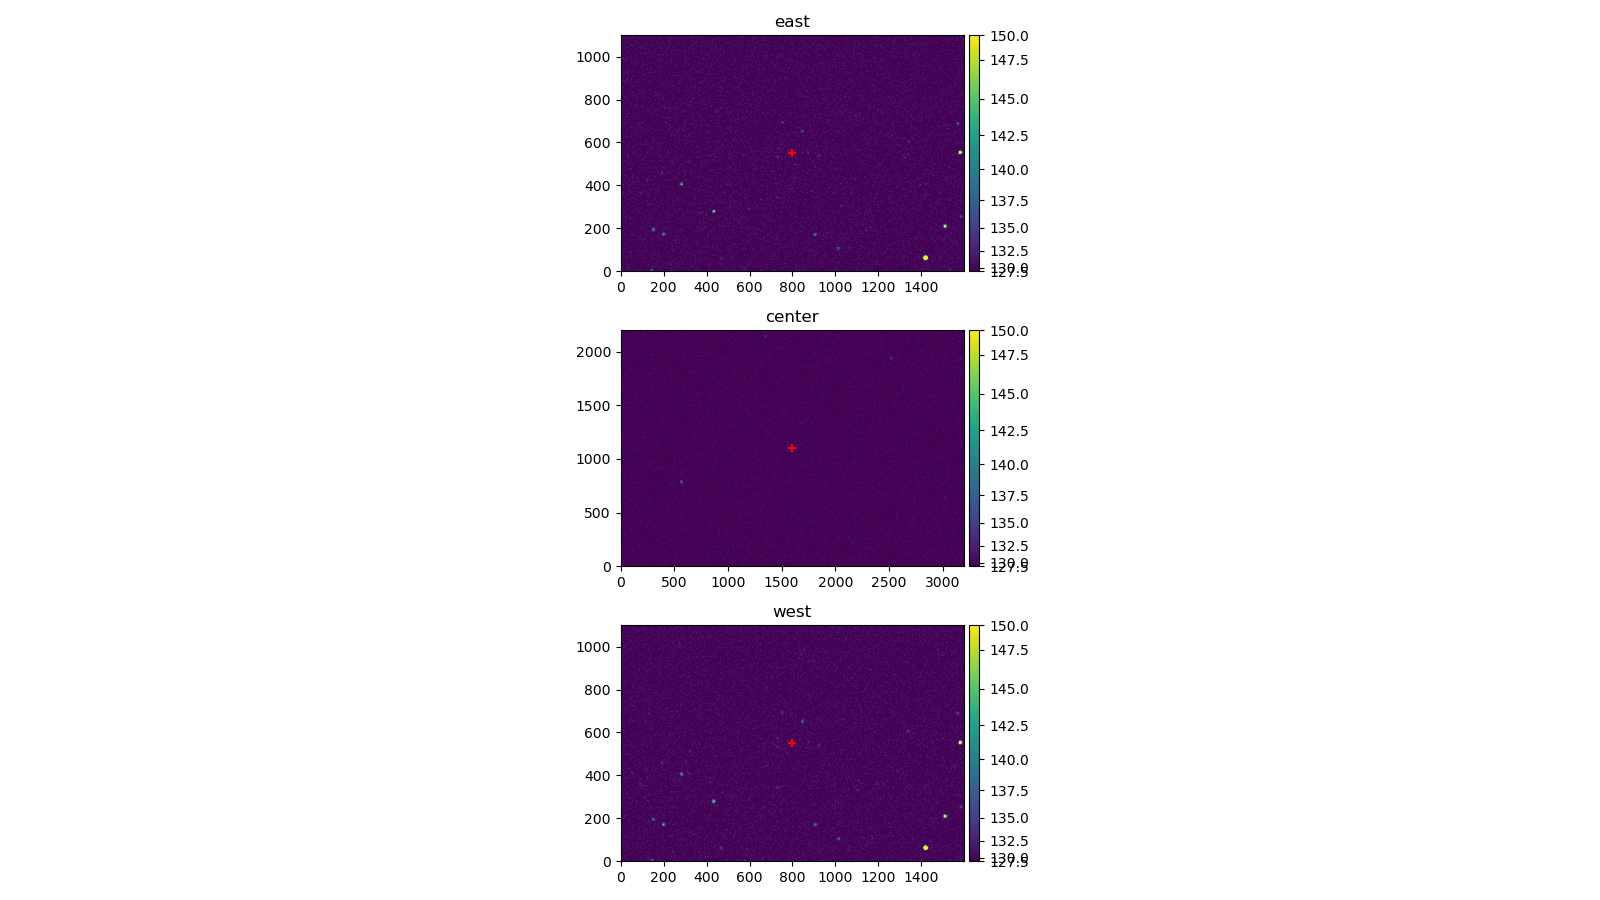

In [5]:
%matplotlib widget

#await tss.foc.moveAbsolute(f_cal[0])

filenames = (await tss.agc.expose(1)).flatten().unpack("*.filename") 
print(filenames)
plot_images([Image.from_file(f) for f in filenames])


In [5]:
%matplotlib widget

from logging import DEBUG, INFO
from lvmtipo.actors import lvm
from lvmagp.focus import Focus
from lvmagp.images.processors.detection import DaophotSourceDetection, SepSourceDetection

from plotimg import plot_images

source_detection = SepSourceDetection(minarea=4.0, threshold=10.0)
focus = Focus(tss, source_detection = source_detection, radius_column = "fwhm", level = DEBUG)

await tss.pwi.status()

def img_cb(imgs):
   plot_images(imgs, vmax=300)

f_cal, f_err = await focus.fine(guess=37, count=3, step=1, exposure_time=5.0, callback=img_cb)

print(f"(focus, err): {f_cal} {f_err}")


[ERROR]: Unknown module type _Nice-Exception:::Nice::ChatException: Bad file descriptor


Exception: Unknown module type _Nice-Exception:::Nice::ChatException: Bad file descriptor

In [ ]:
await tss.agc.reconnect()

In [ ]:
from plotimg import plot_images
from lvmagp.images import Image

print(f_cal[0])
await tss.foc.moveAbsolute(f_cal[0])
filenames = (await tss.agc.expose(1)).flatten().unpack("*.filename") 
print(filenames)
plot_images([Image.from_file(f) for f in filenames])


In [ ]:
%matplotlib widget

from plotimg import plot_images
from lvmagp.images import Image

exptime=0.4

filenames = (await tss.agc.expose(exptime)).flatten().unpack("*.filename") 
print(filenames)
plot_images([Image.from_file(f) for f in filenames])

In [15]:
from plotimg import plot_images
from lvmagp.images import Image

await lvm.spec.agc.start()
await lvm.spec.agc.reconnect()

{'center': {'state': 'online'}}

In [ ]:
#%matplotlib widget
%matplotlib inline

from IPython.display import clear_output

exptime=5

while True:
   clear_output(wait=True)
   filename = (await lvm.spec.agc.expose(exptime)).flatten().unpack("*.filename") 
   print(filename)
   plot_images([Image.from_file(filename)])


/data/lvm/spec/agcam/center/20221110/lvm.spec.agcam.center_00000066.fits


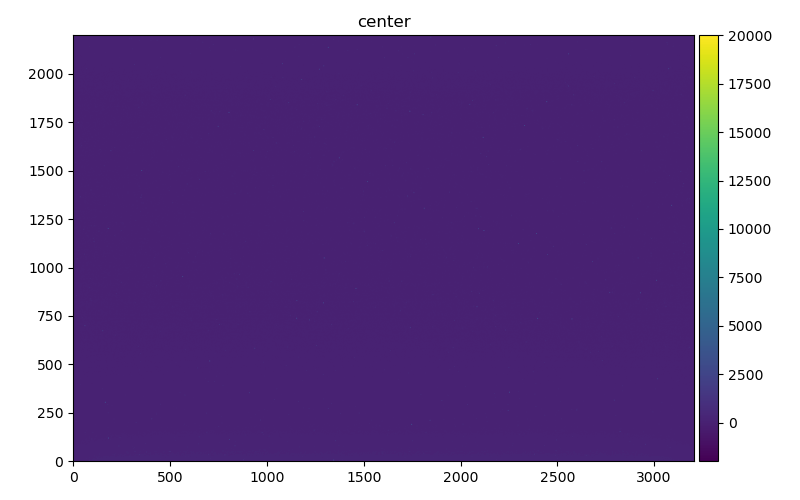

In [31]:
exptime=5


filename = (await lvm.spec.agc.expose(exptime)).flatten().unpack("*.filename") 
print(filename)
plot_images([Image.from_file(filename)],vmin=-2000,vmax=20000)